In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import betainc
from scipy.special import gamma
plt.style.use("fivethirtyeight")

## Binomial Distribution

### PMF

In [26]:
def binom_pmf(n, k, p):
    """
    n: number of trials;
    k: number of successes;
    p: probability of success
    """
    coef = np.math.factorial(n)/(np.math.factorial(k)* np.math.factorial(n-k))
    return coef * p**k * (1-p)**(n-k)

### CDF

In [57]:
def binom_cdf(n, k, p):
    """
    n: number of trials;
    k: number of successes;
    p: probability of success
    """
    S = 0
    for i in range(0, k):
        coef = np.math.factorial(n)/(np.math.factorial(i)* np.math.factorial(n-i))
        S += coef * p**i * (1-p)**(n-i)
    return S       

### Example

In [33]:
binom_pmf_1 = [binom_pmf(20, k, 0.5) for k in range(0, 20)]
binom_pmf_2 = [binom_pmf(20, k, 0.7) for k in range(0, 20)]
binom_pmf_3 = [binom_pmf(40, k, 0.5) for k in range(0, 40)]

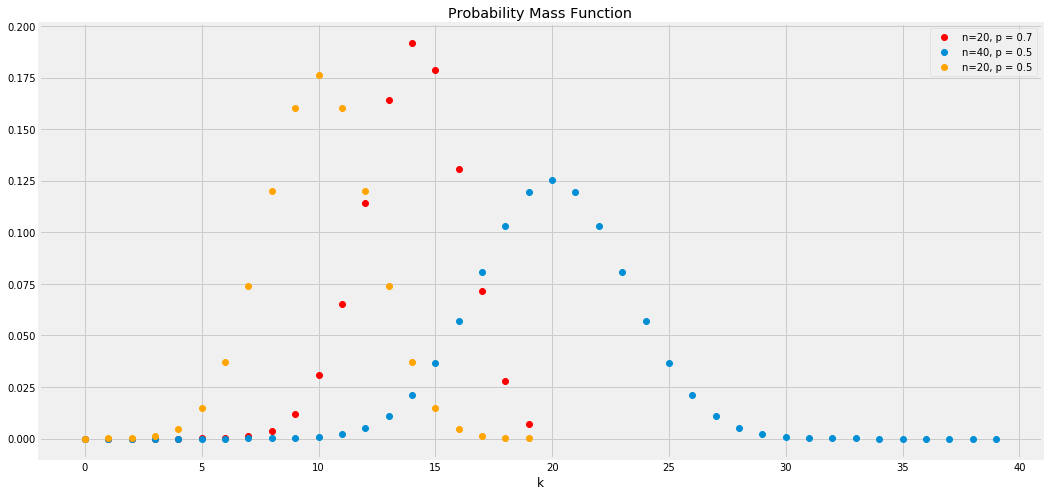

In [56]:
plt.figure(figsize=(16, 8))
plt.plot(range(0, 20), binom_pmf_2, 'ro', linewidth=1, label='n=20, p = 0.7')
plt.plot(range(0, 40), binom_pmf_3, 'o', linewidth=1, label='n=40, p = 0.5')
plt.plot(range(0, 20), binom_pmf_1, 'o', linewidth=1, color='orange', label='n=20, p = 0.5')
plt.legend()
plt.title("Probability Mass Function")
plt.xlabel('k')
plt.savefig('binom_pmf.eps')
plt.show()

In [58]:
binom_cdf_1 = [binom_cdf(20, k, 0.5) for k in range(0, 20)]
binom_cdf_2 = [binom_cdf(20, k, 0.7) for k in range(0, 20)]
binom_cdf_3 = [binom_cdf(40, k, 0.5) for k in range(0, 40)]

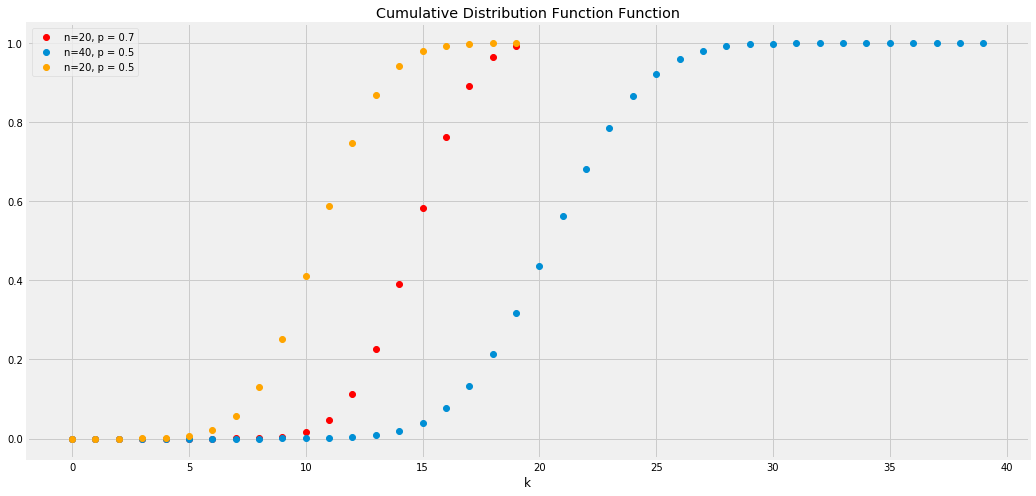

In [63]:
plt.figure(figsize=(16, 8))
plt.plot(range(0, 20), binom_cdf_2, 'ro', linewidth=1, label='n=20, p = 0.7')
plt.plot(range(0, 40), binom_cdf_3, 'o', linewidth=1, label='n=40, p = 0.5')
plt.plot(range(0, 20), binom_cdf_1, 'o', linewidth=1, color='orange', label='n=20, p = 0.5')
plt.legend()
plt.title("Cumulative Distribution Function Function")
plt.xlabel('k')
plt.savefig('binom_cdf.eps')
plt.show()

## Uniform Distribution 

### PDF

In [137]:
def unif_pdf(R, a, b):
    """
    R: range
    a: upper bound
    b: lower bound
    """
    pdf=[]
    for x in R:
        if (x>=a) and (x<=b):
            pdf.append(1/(b-a))
        else:
            pdf.append(0)
    return pdf

### CDF

In [102]:
def unif_cdf(R, a, b):
    """
    R: range
    a: upper bound
    b: lower bound
    """
    cdf = []
    for x in R:
        if x < a:
            cdf.append(0)
        if (x >= a) and (x<b):
            cdf.append((x-a)/(b-a))
        if x >= b:
            cdf.append(1)
    return cdf

### Example

In [89]:
a = 4
b = 10

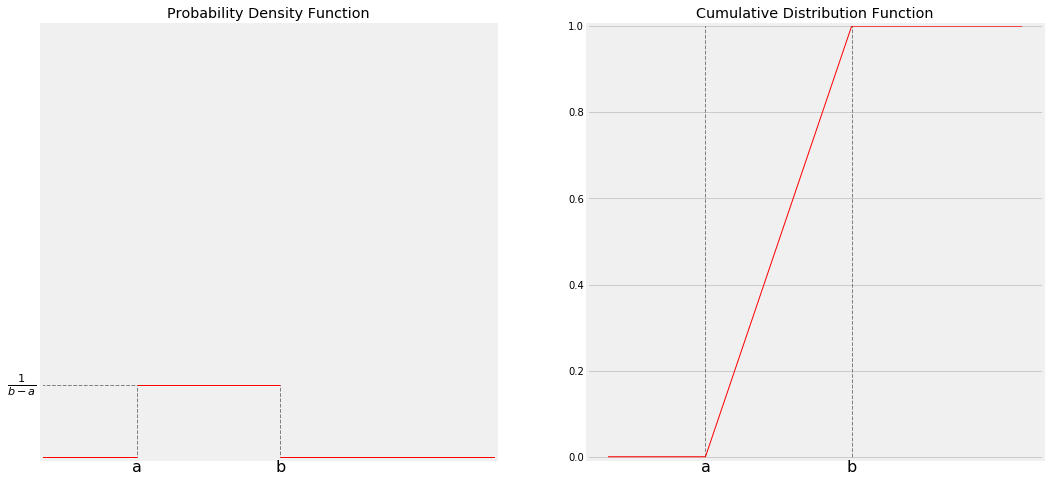

In [190]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(range(a, b+1), unif_pdf(range(a, b+1), a, b), linewidth=1, color='red')
ax[0].plot(range(0, a+1), np.zeros_like(range(0, a+1)), color='red', linewidth=1)
ax[0].plot(range(b, 20), np.zeros_like(range(b, 20)), linewidth=1, color='red')
ymin, ymax = ax[0].get_ylim()
ax[0].vlines(a, ymin, 1/(b-a), linewidth=1, linestyle='dashed', color='gray')
ax[0].vlines(b, ymin, 1/(b-a), linewidth=1, linestyle='dashed', color='gray')
ax[0].hlines(1/(b-a), 0, a, linewidth=1, linestyle='dashed', color='gray')
ax[0].set_ylim([-.005, 1.005])
ax[0].set_xlim([-.005, 19])
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].text(a-.2, -.035, "a", fontsize=16)
ax[0].text(b-.2, -.035, "b", fontsize=16)
ax[0].text(-1.4, 1/(b-a)-.01, r"$\frac{1}{b-a}$", fontsize=16)


ax[0].set_title("Probability Density Function")

ax[1].plot(range(0, 18), unif_cdf(range(0, 18), a, b), linewidth=1, color='r')
ax[1].set_title("Cumulative Distribution Function")
ymin, ymax = ax[1].get_ylim()
ax[1].vlines(a, ymin, ymax, linewidth=1, linestyle='dashed', color='gray')
ax[1].vlines(b, ymin, ymax, linewidth=1, linestyle='dashed', color='gray')
ax[1].set_ylim([-.005, 1.005])
ax[1].set_xticks([])
ax[1].text(a-.2, -.035, "a", fontsize=16)
ax[1].text(b-.2, -.035, "b", fontsize=16)

plt.savefig("uniform_plots.eps")
plt.show()

## Normal Distribution

### PDF

In [205]:
def norm_pdf(x, mu, var):
    A = 1/(np.sqrt(2*np.pi*var))
    return A * np.exp(-(x-mu)**2/(2*var**2))

### CDF

In [206]:
def norm_cdf(x, mu, var):
    std = np.sqrt(var)
    return 0.5 * (1+np.math.erf((x-mu)/(std * np.sqrt(2))))

### Example

In [225]:
norm_pdf_1 = [norm_pdf(x, 0, 0.2) for x in np.linspace(-5, 5,1000)]
norm_pdf_2 = [norm_pdf(x, 0, 1) for x in np.linspace(-5, 5,1000)]
norm_pdf_3 = [norm_pdf(x, 0, 5) for x in np.linspace(-5, 5,1000)]
norm_pdf_4 = [norm_pdf(x, -2, .5) for x in np.linspace(-5, 5,1000)]

norm_cdf_1 = [norm_cdf(x, 0, 0.2) for x in np.linspace(-5, 5,1000)]
norm_cdf_2 = [norm_cdf(x, 0, 1) for x in np.linspace(-5, 5,1000)]
norm_cdf_3 = [norm_cdf(x, 0, 5) for x in np.linspace(-5, 5,1000)]
norm_cdf_4 = [norm_cdf(x, -2, .5) for x in np.linspace(-5, 5,1000)]

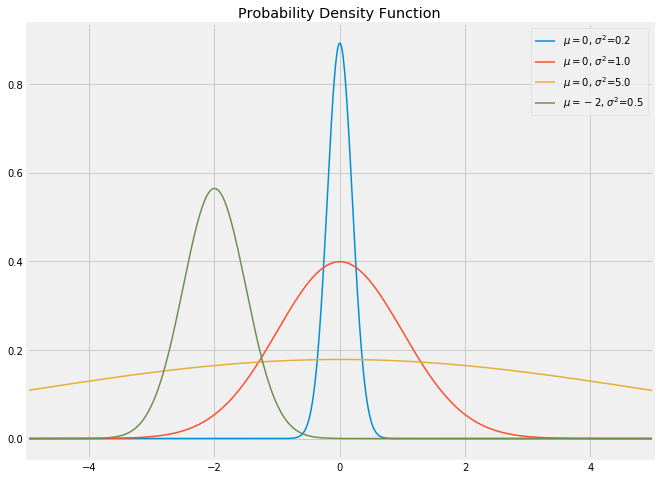

In [220]:
plt.figure(figsize=(10, 8))
plt.title("Probability Density Function")
plt.plot(np.linspace(-5, 5,1000), norm_pdf_1, linewidth=1.5, label=r"$\mu=0$, $\sigma^2$=0.2")
plt.plot(np.linspace(-5, 5,1000), norm_pdf_2, linewidth=1.5, label=r"$\mu=0$, $\sigma^2$=1.0")
plt.plot(np.linspace(-5, 5,1000), norm_pdf_3, linewidth=1.5, label=r"$\mu=0$, $\sigma^2$=5.0")
plt.plot(np.linspace(-5, 5,1000), norm_pdf_4, linewidth=1.5, label=r"$\mu=-2$, $\sigma^2$=0.5")
plt.legend()
plt.xlim([-5, 5])
plt.savefig("norm_pdf.eps")
plt.show()

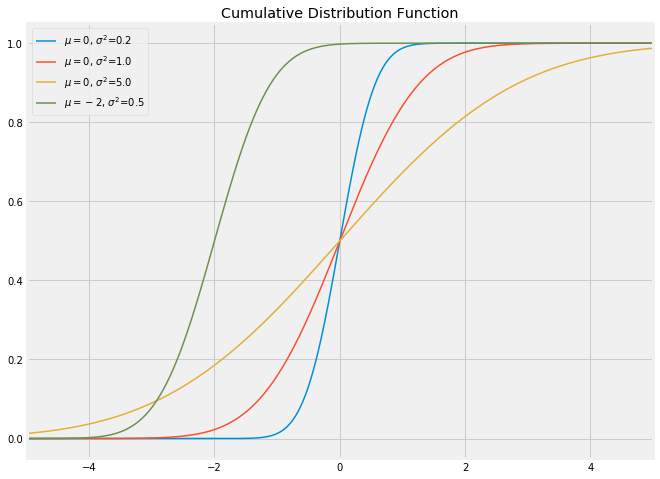

In [224]:
plt.figure(figsize=(10, 8))
plt.title("Cumulative Distribution Function")
plt.plot(np.linspace(-5, 5,1000), norm_cdf_1, linewidth=1.5, label=r"$\mu=0$, $\sigma^2$=0.2")
plt.plot(np.linspace(-5, 5,1000), norm_cdf_2, linewidth=1.5, label=r"$\mu=0$, $\sigma^2$=1.0")
plt.plot(np.linspace(-5, 5,1000), norm_cdf_3, linewidth=1.5, label=r"$\mu=0$, $\sigma^2$=5.0")
plt.plot(np.linspace(-5, 5,1000), norm_cdf_4, linewidth=1.5, label=r"$\mu=-2$, $\sigma^2$=0.5")
plt.legend()
plt.xlim([-5, 5])
plt.savefig("norm_cdf.eps")
plt.show()

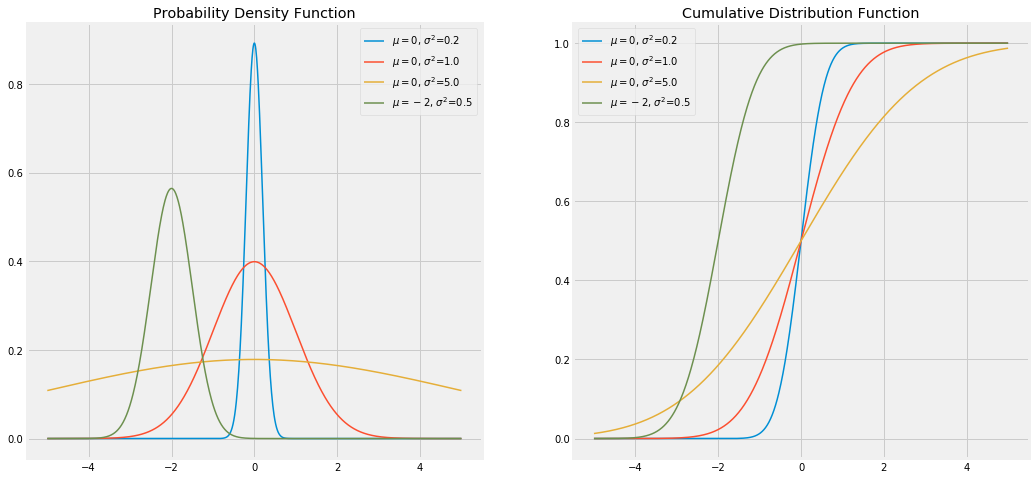

In [237]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].set_title("Probability Density Function")
ax[0].plot(np.linspace(-5, 5,1000), norm_pdf_1, linewidth=1.5, label=r"$\mu=0$, $\sigma^2$=0.2")
ax[0].plot(np.linspace(-5, 5,1000), norm_pdf_2, linewidth=1.5, label=r"$\mu=0$, $\sigma^2$=1.0")
ax[0].plot(np.linspace(-5, 5,1000), norm_pdf_3, linewidth=1.5, label=r"$\mu=0$, $\sigma^2$=5.0")
ax[0].plot(np.linspace(-5, 5,1000), norm_pdf_4, linewidth=1.5, label=r"$\mu=-2$, $\sigma^2$=0.5")
ax[0].legend([r"$\mu=0$, $\sigma^2$=0.2", r"$\mu=0$, $\sigma^2$=1.0", r"$\mu=0$, $\sigma^2$=5.0", r"$\mu=-2$, $\sigma^2$=0.5"])
ax[1].set_title("Cumulative Distribution Function")
ax[1].plot(np.linspace(-5, 5,1000), norm_cdf_1, linewidth=1.5, label=r"$\mu=0$, $\sigma^2$=0.2")
ax[1].plot(np.linspace(-5, 5,1000), norm_cdf_2, linewidth=1.5, label=r"$\mu=0$, $\sigma^2$=1.0")
ax[1].plot(np.linspace(-5, 5,1000), norm_cdf_3, linewidth=1.5, label=r"$\mu=0$, $\sigma^2$=5.0")
ax[1].plot(np.linspace(-5, 5,1000), norm_cdf_4, linewidth=1.5, label=r"$\mu=-2$, $\sigma^2$=0.5")
ax[1].legend([r"$\mu=0$, $\sigma^2$=0.2", r"$\mu=0$, $\sigma^2$=1.0", r"$\mu=0$, $\sigma^2$=5.0", r"$\mu=-2$, $\sigma^2$=0.5"])
plt.savefig("normal_plots.eps")
plt.show()

## Poisson Distribution

### PMF

In [242]:
def po_pmf(Lambda, k):
    return (Lambda**k * np.exp(-Lambda))/ np.math.factorial(k)

### CDF

In [240]:
def po_cdf(Lambda, k):
    S = 0
    for i in range(0, k):
        S += np.exp(-Lambda) * Lambda**i/np.math.factorial(i)
    return S

### Example

In [245]:
po_pmf_1 = [po_pmf(1, k) for k in range(0, 21)]
po_pmf_2 = [po_pmf(4, k) for k in range(0, 21)]
po_pmf_3 = [po_pmf(10, k) for k in range(0, 21)]

po_cdf_1 = [po_cdf(1, k) for k in range(0, 21)]
po_cdf_2 = [po_cdf(4, k) for k in range(0, 21)]
po_cdf_3 = [po_cdf(10, k) for k in range(0, 21)]

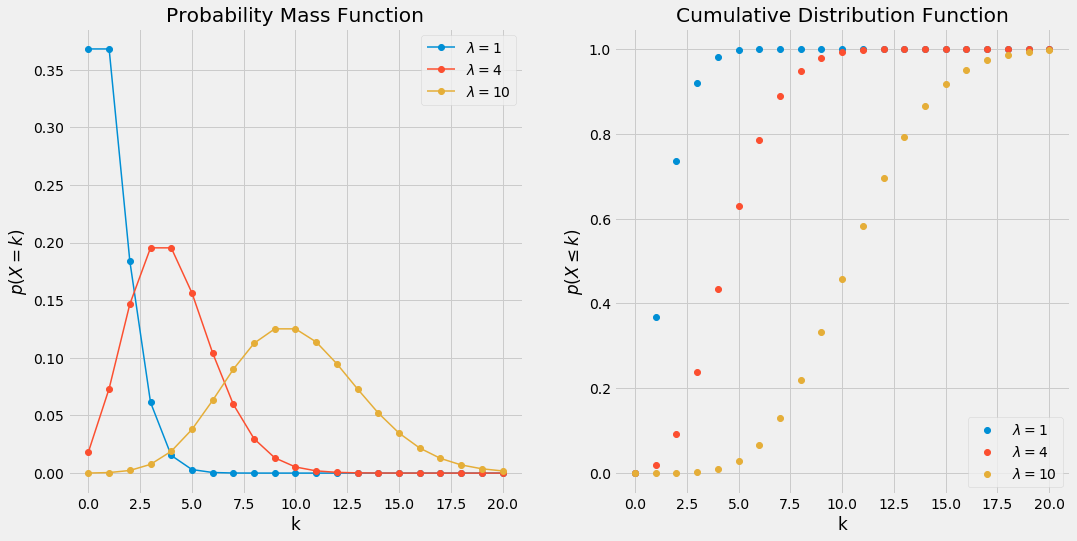

In [265]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].set_title("Probability Mass Function")
ax[0].plot(np.arange(0, 21), po_pmf_1, linewidth=1.5, marker='o')
ax[0].plot(np.arange(0, 21), po_pmf_2, linewidth=1.5, marker='o')
ax[0].plot(np.arange(0, 21), po_pmf_3, linewidth=1.5, marker='o')
ax[0].legend([r"$\lambda=1$", r"$\lambda=4$", r"$\lambda=10$"])
ax[0].set_xlabel('k')
ax[0].set_ylabel(r"$p(X=k)$")

ax[1].set_title("Cumulative Distribution Function")
ax[1].plot(np.arange(0, 21), po_cdf_1, 'o', linewidth=1.5)
ax[1].plot(np.arange(0, 21), po_cdf_2, 'o', linewidth=1.5)
ax[1].plot(np.arange(0, 21), po_cdf_3, 'o', linewidth=1.5)
ax[1].legend([r"$\lambda=1$", r"$\lambda=4$", r"$\lambda=10$"])
ax[1].set_xlabel('k')
ax[1].set_ylabel(r"$p(X\leq k)$")

plt.savefig("Poisson_plots.eps")
plt.show()

## Exponential Distribution

### PDF

In [266]:
def exp_pdf(Lambda, x):
    return Lambda * np.exp(-Lambda * x)

### CDF

In [267]:
def exp_cdf(Lambda, x):
    return 1- np.exp(-Lambda*x)

### Example

In [274]:
exp_pdf_1 = [exp_pdf(0.5, x) for x in np.linspace(0, 6, 1000)]
exp_pdf_2 = [exp_pdf(1, x) for x in np.linspace(0, 6, 1000)]
exp_pdf_3 = [exp_pdf(1.5, x) for x in np.linspace(0, 6, 1000)]

exp_cdf_1 = [exp_cdf(0.5, x) for x in np.linspace(0, 6, 1000)]
exp_cdf_2 = [exp_cdf(1, x) for x in np.linspace(0, 6, 1000)]
exp_cdf_3 = [exp_cdf(1.5, x) for x in np.linspace(0, 6, 1000)]

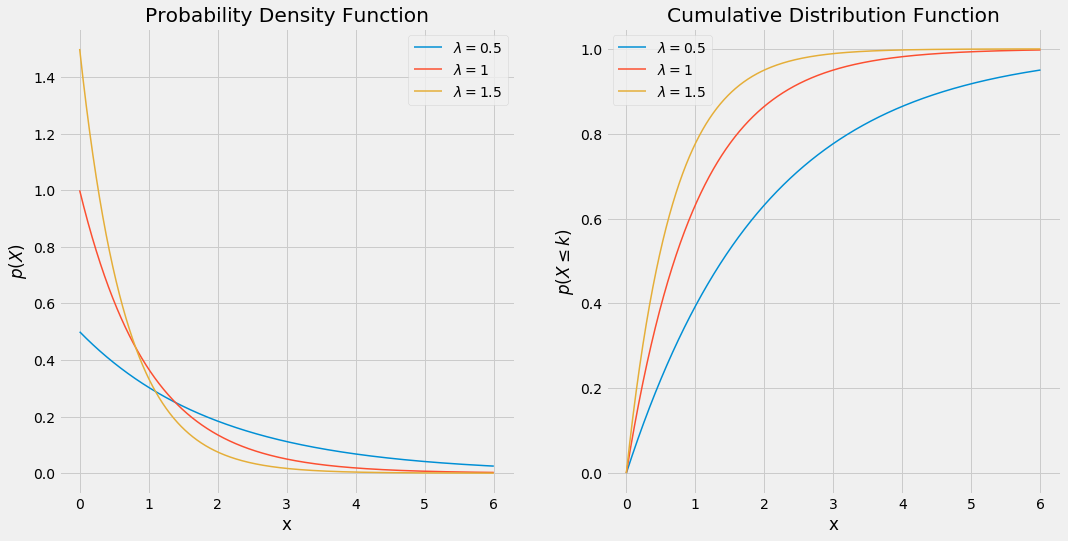

In [302]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].set_title("Probability Density Function")
ax[0].plot(np.linspace(0, 6, 1000), exp_pdf_1, linewidth=1.5)
ax[0].plot(np.linspace(0, 6, 1000), exp_pdf_2, linewidth=1.5)
ax[0].plot(np.linspace(0, 6, 1000), exp_pdf_3, linewidth=1.5)
ax[0].legend([r"$\lambda=0.5$", r"$\lambda=1$", r"$\lambda=1.5$"])
ax[0].set_xlabel('x')
ax[0].set_ylabel(r"$p(X)$")

ax[1].set_title("Cumulative Distribution Function")
ax[1].plot(np.linspace(0, 6, 1000), exp_cdf_1, linewidth=1.5)
ax[1].plot(np.linspace(0, 6, 1000), exp_cdf_2, linewidth=1.5)
ax[1].plot(np.linspace(0, 6, 1000), exp_cdf_3, linewidth=1.5)
ax[1].legend([r"$\lambda=0.5$", r"$\lambda=1$", r"$\lambda=1.5$"])
ax[1].set_xlabel('x')
ax[1].set_ylabel(r"$p(X\leq k)$")

plt.savefig("Exp_plots.eps")
plt.show()

## Beta Distribution

In [1]:
def B(a, b):
    return (gamma(a) * gamma(b))/ gamma(a+b)

### PDF

In [2]:
def beta_pdf(a, b, x):
    return (x**(a-1) * (1-x)**(b-1))/B(a, b)

### CDF

In [3]:
def beta_cdf(a, b, x):
    return betainc(a, b, x)

### Example

In [10]:
beta_pdf_1 = [beta_pdf(0.5, 0.5, x) for x in np.linspace(0, 1, 1000)]
beta_pdf_2 = [beta_pdf(5, 1, x) for x in np.linspace(0, 1, 1000)]
beta_pdf_3 = [beta_pdf(1, 3, x) for x in np.linspace(0, 1, 1000)]
beta_pdf_4 = [beta_pdf(2, 2, x) for x in np.linspace(0, 1, 1000)]
beta_pdf_5 = [beta_pdf(2, 5, x) for x in np.linspace(0, 1, 1000)]


beta_cdf_1 = [beta_cdf(0.5, 0.5, x) for x in np.linspace(0, 1, 1000)]
beta_cdf_2 = [beta_cdf(5, 1, x) for x in np.linspace(0, 1, 1000)]
beta_cdf_3 = [beta_cdf(1, 3, x) for x in np.linspace(0, 1, 1000)]
beta_cdf_4 = [beta_cdf(2, 2, x) for x in np.linspace(0, 1, 1000)]
beta_cdf_5 = [beta_cdf(2, 5, x) for x in np.linspace(0, 1, 1000)]

/Users/sepehr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


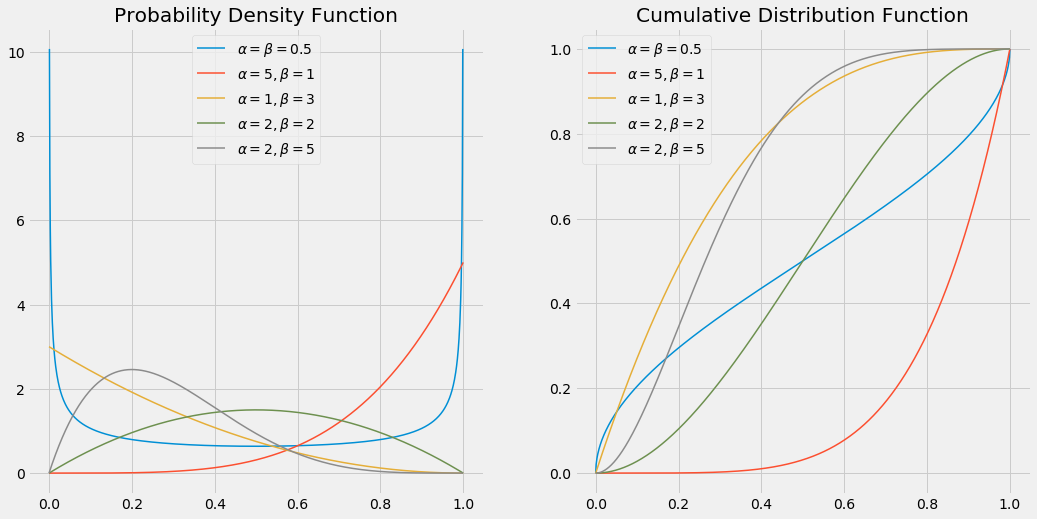

In [301]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].set_title("Probability Density Function")
ax[0].plot(np.linspace(0, 1, 1000), beta_pdf_1, linewidth=1.5)
ax[0].plot(np.linspace(0, 1, 1000), beta_pdf_2, linewidth=1.5)
ax[0].plot(np.linspace(0, 1, 1000), beta_pdf_3, linewidth=1.5)
ax[0].plot(np.linspace(0, 1, 1000), beta_pdf_4, linewidth=1.5)
ax[0].plot(np.linspace(0, 1, 1000), beta_pdf_5, linewidth=1.5)
ax[0].legend([r"$\alpha=\beta=0.5$", r"$\alpha=5, \beta=1$", r"$\alpha=1, \beta=3$", r"$\alpha=2, \beta=2$", r"$\alpha=2, \beta=5$"])


ax[1].set_title("Cumulative Distribution Function")
ax[1].plot(np.linspace(0, 1, 1000), beta_cdf_1, linewidth=1.5)
ax[1].plot(np.linspace(0, 1, 1000), beta_cdf_2, linewidth=1.5)
ax[1].plot(np.linspace(0, 1, 1000), beta_cdf_3, linewidth=1.5)
ax[1].plot(np.linspace(0, 1, 1000), beta_cdf_4, linewidth=1.5)
ax[1].plot(np.linspace(0, 1, 1000), beta_cdf_5, linewidth=1.5)
ax[1].legend([r"$\alpha=\beta=0.5$", r"$\alpha=5, \beta=1$", r"$\alpha=1, \beta=3$", r"$\alpha=2, \beta=2$", r"$\alpha=2, \beta=5$"])

plt.savefig("Beta_plots.eps")
plt.show()